# Kaggle Data Set, Sector: Finance

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from seaborn import set_style
from datetime import datetime, timedelta
set_style("whitegrid")

In [2]:
# huge dataset with 20 million rows
df = pd.read_csv('historical_stock_prices.csv')
df

,ticker,open,close,adj_close,low,high,volume,date
0,AHH,11.50,11.58,8.493155,11.25,11.68,4633900,2013-05-08
1,AHH,11.66,11.55,8.471151,11.50,11.66,275800,2013-05-09
2,AHH,11.55,11.60,8.507822,11.50,11.60,277100,2013-05-10
3,AHH,11.63,11.65,8.544494,11.55,11.65,147400,2013-05-13
4,AHH,11.60,11.53,8.456484,11.50,11.60,184100,2013-05-14
...,...,...,...,...,...,...,...,...
20973884,NZF,14.60,14.59,14.590000,14.58,14.62,137500,2018-08-20
20973885,NZF,14.60,14.58,14.580000,14.57,14.61,151200,2018-08-21
20973886,NZF,14.58,14.59,14.590000,14.57,14.63,185400,2018-08-22
20973887,NZF,14.60,14.57,14.570000,14.57,14.64,135600,2018-08-23


In [3]:
# getting the codes that tell us what the stocks are; e.g. PIH = Property Insurance Holdings
df2=pd.read_csv('historical_stocks.csv')
df2.head()

,ticker,exchange,name,sector,industry
0,PIH,NASDAQ,"1347 PROPERTY INSURANCE HOLDINGS, INC.",FINANCE,PROPERTY-CASUALTY INSURERS
1,PIHPP,NASDAQ,"1347 PROPERTY INSURANCE HOLDINGS, INC.",FINANCE,PROPERTY-CASUALTY INSURERS
2,TURN,NASDAQ,180 DEGREE CAPITAL CORP.,FINANCE,FINANCE/INVESTORS SERVICES
3,FLWS,NASDAQ,"1-800 FLOWERS.COM, INC.",CONSUMER SERVICES,OTHER SPECIALTY STORES
4,FCCY,NASDAQ,1ST CONSTITUTION BANCORP (NJ),FINANCE,SAVINGS INSTITUTIONS


In [4]:
# get all the stocks in transportation
finance = df2[df2['sector']=='FINANCE'][['ticker','name']]
finance.sample(10)

,ticker,name
1100,FSFG,"FIRST SAVINGS FINANCIAL GROUP, INC."
5864,IPOA,SOCIAL CAPITAL HEDOSOPHIA HOLDINGS CORP.
1705,JRVR,"JAMES RIVER GROUP HOLDINGS, LTD."
2089,NSEC,"NATIONAL SECURITY GROUP, INC."
3122,VEAC,VANTAGE ENERGY ACQUISITION CORP.
2755,SMBK,"SMARTFINANCIAL, INC."
4608,CO,GLOBAL CORD BLOOD CORPORATION
4999,LM,"LEGG MASON, INC."
2722,BSRR,SIERRA BANCORP
3970,CB,CHUBB LIMITED


In [7]:
# 1022 stocks in finance
finance['ticker'].values

array(['PIH', 'PIHPP', 'TURN', ..., 'XL', 'YRD', 'ZBK'], dtype=object)

In [8]:
def get_stocks(df, df2, stock_code):
    # get prices for a particular stock; this function takes in two data frames where one has the prices
    # the other has the codes
    print(df2[df2['ticker']==stock_code])
    return df[df['ticker']==stock_code].reset_index()

In [9]:
df_PIH=get_stocks(df,df2,'PIH')
df_PIH

  ticker exchange                                    name   sector  \
0    PIH   NASDAQ  1347 PROPERTY INSURANCE HOLDINGS, INC.  FINANCE   

                     industry  
0  PROPERTY-CASUALTY INSURERS  


,index,ticker,open,close,adj_close,low,high,volume,date
0,2386493,PIH,8.000,7.950,7.950,7.900,8.500,642900,2014-04-01
1,2386510,PIH,7.940,8.160,8.160,7.900,8.290,228400,2014-04-02
2,2386515,PIH,8.290,8.390,8.390,8.050,8.400,105000,2014-04-03
3,2386516,PIH,8.500,8.690,8.690,8.320,8.700,113600,2014-04-04
4,2386533,PIH,9.000,8.940,8.940,8.550,9.000,60500,2014-04-07
...,...,...,...,...,...,...,...,...,...
1090,2398342,PIH,7.050,7.097,7.097,6.997,7.097,1600,2018-08-20
1091,2398359,PIH,7.097,7.050,7.050,7.000,7.098,1100,2018-08-21
1092,2398363,PIH,7.000,7.099,7.099,7.000,7.100,3800,2018-08-22
1093,2398379,PIH,7.000,6.979,6.979,6.979,7.000,600,2018-08-23


In [10]:
def add_datetime(df, date):
    # assuming the dataframe has a column with dates as strings, we want to convert them to datetime
    df['date_time'] = df['date'].apply(lambda day: datetime.strptime(day,'%Y-%m-%d').date()) 


In [11]:
add_datetime(df_PIH,'date')

In [12]:
df_PIH.head()

,index,ticker,open,close,adj_close,low,high,volume,date,date_time
0,2386493,PIH,8.00,7.95,7.95,7.90,8.50,642900,2014-04-01,2014-04-01
1,2386510,PIH,7.94,8.16,8.16,7.90,8.29,228400,2014-04-02,2014-04-02
2,2386515,PIH,8.29,8.39,8.39,8.05,8.40,105000,2014-04-03,2014-04-03
3,2386516,PIH,8.50,8.69,8.69,8.32,8.70,113600,2014-04-04,2014-04-04
4,2386533,PIH,9.00,8.94,8.94,8.55,9.00,60500,2014-04-07,2014-04-07


In [13]:
def custom_time_indexing(df, date_column):
    """
    Function to reindex a DataFrame with a custom index that reflects gaps in a time series,
    while keeping the original date column for plotting, without modifying the original DataFrame.

    Parameters:
    df (pd.DataFrame): Input DataFrame.
    date_column (str): Name of the column containing datetime objects.

    Returns:
    pd.DataFrame: A new DataFrame with the custom index reflecting date gaps,
                  while retaining the original dates in a new column.
    list: A list of the original date labels corresponding to valid data rows.
    """
    # Work on a copy of the DataFrame to avoid modifying the original
    df_copy = df.copy()

    # Ensure the date_column is of datetime type
    df_copy[date_column] = pd.to_datetime(df_copy[date_column])

    # Set the date column as the index
    df_copy.set_index(date_column, inplace=True)

    # Generate the full date range (including missing dates)
    full_range = pd.date_range(start=df_copy.index.min(), end=df_copy.index.max())

    # Reindex the DataFrame to include the full range of dates
    df_reindexed = df_copy.reindex(full_range)

    # Create a custom index that increments by 1, but jumps when there are missing dates
    custom_index = []
    current_index = 1

    for i in range(len(df_reindexed)):
        if i == 0:
            custom_index.append(current_index)
        else:
            # Check if the current date is consecutive to the previous one
            if df_reindexed.index[i] - df_reindexed.index[i-1] > timedelta(days=1):
                # Increase the custom index by the actual day difference
                current_index += (df_reindexed.index[i] - df_reindexed.index[i-1]).days
            else:
                current_index += 1
            custom_index.append(current_index)

    # Assign the custom index to the DataFrame
    df_reindexed['custom_index'] = custom_index

    # Drop the rows where there are missing values
    df_final = df_reindexed.dropna()

    # Add the original date index as a new column and make it a datetime object
    df_final['date_time'] = df_final.index
    df_final['date_time']=df_final['date_time'].apply(lambda day: day.date())

    # Set the new custom index
    df_final.set_index('custom_index', inplace=True)

    # Return the final DataFrame and the valid original dates
    return df_final, df_final['date_time']


In [14]:
# try to ignore warnings
import warnings

In [16]:
with warnings.catch_warnings():
    warnings.simplefilter("ignore")  # Ignore all warnings
    df_PIH_reindex,valid_dates = custom_time_indexing(df_PIH, 'date_time')

In [17]:
start_date = df_PIH_reindex.loc[1]['date_time']
end_date = df_PIH_reindex.tail(1)['date_time']

total_days = (end_date - start_date)
total_days.values[0].days


1606

In [18]:
def linspace_dates(df,num_ticks):
    # because of missing dates, we have to do some annoying stuff there are about 14000 days between the first
    # and last day for UNP but some dates are skipped and so we have only 9400 or so datapoints
    # to properly plot, we will get some evenly spaced segments and then get the correct corresponding days

    start_date = df.loc[1]['date_time']
    end_date = df.tail(1)['date_time']
    
    # Calculate the total number of days in the range
    total_days = (end_date - start_date).values[0].days

    # Number of segments
    num_segments = num_ticks-1 # one less than the number of ticks desired

    # Calculate the length of each segment in days
    segment_length = total_days / num_segments

    # Create a list to hold the tick mark dates
    tick_dates = []

    # Calculate the dates for each tick mark
    for i in range(num_segments + 1):
        tick_date = start_date + timedelta(days=segment_length * i)
        tick_dates.append(tick_date)

    # Convert tick_dates to a list of strings for labeling
    tick_labels = [date.strftime('%Y-%m-%d') for date in tick_dates]

    # return the tick dates and labels
    return tick_dates, tick_labels


In [19]:
PIH_tick_dates, PIH_tick_labels = linspace_dates(df_PIH_reindex,10)

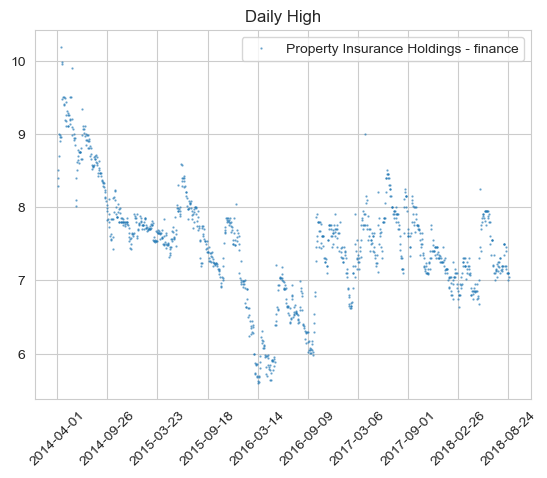

In [53]:
# we can plot Union Pacific now with the missing dates, it seems to know to plot the years on the x-axis now
# the issue is that it's not correctly spaced; the skips in time might not always be the same amount
#plt.plot(df_UNP.index,df_UNP['high'],label='Union Pacific - transportation',alpha=0.4)

plt.scatter(df_PIH_reindex.index,df_PIH_reindex['high'],label='Property Insurance Holdings - finance',alpha=0.6,s=0.4)
plt.title('Daily High')

num_entries = df_PIH_reindex.index.max()

# Set a desired number of ticks; in the cell above, we had num_segments = 9 (one less than num_ticks)
num_ticks = 10

# Generate equally spaced tick positions
PIH_tick_positions = np.linspace(0, num_entries - 1, num_ticks).astype(int)

# Set the ticks and their corresponding labels from the original dates
plt.xticks(ticks=PIH_tick_positions, labels=PIH_tick_labels, rotation=45)

# Set x-axis limits to span the full range of the custom index
#plt.xlim(df_UNP_reindex.index.min(), df_UNP_reindex.index.max())

plt.legend()
plt.show()

# Daylight Savings

We now begin to study DST

In [22]:
DST = pd.read_csv('DaylightSavingsTimeChangeDates_1971-2024.csv')

In [23]:
# Adding 1970 date
new_row = pd.DataFrame({'Year': [1970], 'Day of Week': ['Sunday'], 'Date': ['26 April'], 'Time before change': ['2:00'], 'Time after change':['3:00'],'Day of Week.1':['Sunday'], 'Date.1': ['25 October'], 'Time before change.1': ['2:00'], 'Time after change.1':['1:00']})

In [24]:
# Prepend the row using pd.concat()
DST = pd.concat([new_row, DST], ignore_index=True)

In [25]:
DST.head(2)

,Year,Day of Week,Date,Time before change,Time after change,Day of Week.1,Date.1,Time before change.1,Time after change.1
0,1970,Sunday,26 April,2:00,3:00,Sunday,25 October,2:00,1:00
1,1971,Sunday,25 April,2:00,3:00,Sunday,31 October,2:00,1:00


In [27]:
DST.to_csv('DST1970-2024.csv')

In [28]:
dst_spring_dates = pd.to_datetime(DST.Date+" "+DST.Year.astype(str))
dst_fall_dates = pd.to_datetime(DST['Date.1']+" "+DST.Year.astype(str))

In [29]:
dst_mon_spring = dst_spring_dates+pd.DateOffset(1)
dst_fri_spring = dst_spring_dates+pd.DateOffset(-2)

In [30]:
dst_mon_fall = dst_fall_dates+pd.DateOffset(1)
dst_fri_fall = dst_fall_dates+pd.DateOffset(-2)

In [31]:
# make the object datetime instead of timestamp
dst_mon_spring=dst_mon_spring.apply(lambda day: day.date())
dst_fri_spring=dst_fri_spring.apply(lambda day: day.date())

dst_mon_fall=dst_mon_fall.apply(lambda day: day.date())
dst_fri_fall=dst_fri_fall.apply(lambda day: day.date())


In [32]:
DST_fri_mon = pd.concat([pd.DataFrame(dst_fri_spring),pd.DataFrame(dst_mon_spring),pd.DataFrame(dst_fri_fall),pd.DataFrame(dst_mon_fall)],axis=1)

In [33]:
DST_fri_mon.columns = ['spring_fri_before','spring_mon_after','fall_fri_before','fall_mon_after']

In [34]:
# now we have this in a .csv file; but when using it, we probably want to get the columns to be
# datetime objects, not just strings
DST_fri_mon.to_csv('DST_fri_mon.csv')

In [36]:
DST_fri_mon.head()

,spring_fri_before,spring_mon_after,fall_fri_before,fall_mon_after
0,1970-04-24,1970-04-27,1970-10-23,1970-10-26
1,1971-04-23,1971-04-26,1971-10-29,1971-11-01
2,1972-04-28,1972-05-01,1972-10-27,1972-10-30
3,1973-04-27,1973-04-30,1973-10-26,1973-10-29
4,1974-01-04,1974-01-07,1974-10-25,1974-10-28


In [37]:
df_PIH_reindex

,index,ticker,open,close,adj_close,low,high,volume,date,date_time
custom_index,,,,,,,,,,
1,2386493.0,PIH,8.000,7.950,7.950,7.900,8.500,642900.0,2014-04-01,2014-04-01
2,2386510.0,PIH,7.940,8.160,8.160,7.900,8.290,228400.0,2014-04-02,2014-04-02
3,2386515.0,PIH,8.290,8.390,8.390,8.050,8.400,105000.0,2014-04-03,2014-04-03
4,2386516.0,PIH,8.500,8.690,8.690,8.320,8.700,113600.0,2014-04-04,2014-04-04
7,2386533.0,PIH,9.000,8.940,8.940,8.550,9.000,60500.0,2014-04-07,2014-04-07
...,...,...,...,...,...,...,...,...,...,...
1603,2398342.0,PIH,7.050,7.097,7.097,6.997,7.097,1600.0,2018-08-20,2018-08-20
1604,2398359.0,PIH,7.097,7.050,7.050,7.000,7.098,1100.0,2018-08-21,2018-08-21
1605,2398363.0,PIH,7.000,7.099,7.099,7.000,7.100,3800.0,2018-08-22,2018-08-22


In [38]:
# VERY USEFUL function for getting the stock prices; need dataframe, spring/fall, metric

def get_dst_fri_mon_prices(df,season,fri_metric,mon_metric):
    # season = spring/fall
    # metric1,2 = high, low, open, close, volume, etc.
    dst_mon_fri_prices=[]
    fri_str = season + '_fri_before'
    mon_str = season + '_mon_after'

    for fri,mon in zip(DST_fri_mon[fri_str].values, DST_fri_mon[mon_str].values):
        if (fri in df['date_time'].values) and (mon in df['date_time'].values):
            print('Have data for both:',fri.strftime('%Y-%m-%d'), mon.strftime('%Y-%m-%d'))

            fri_price=df.loc[df['date_time'] == fri, fri_metric].values[0]
            mon_price=df.loc[df['date_time'] == mon, mon_metric].values[0]
            
            dst_mon_fri_prices.append((fri,mon,fri_price,mon_price))
        else:
            print('Missing data for at least one of:', fri.strftime('%Y-%m-%d'), mon.strftime('%Y-%m-%d')) 
    return dst_mon_fri_prices 

In [39]:
df_PIH_spring_high=get_dst_fri_mon_prices(df_PIH_reindex,'spring','high','high')

Missing data for at least one of: 1970-04-24 1970-04-27
Missing data for at least one of: 1971-04-23 1971-04-26
Missing data for at least one of: 1972-04-28 1972-05-01
Missing data for at least one of: 1973-04-27 1973-04-30
Missing data for at least one of: 1974-01-04 1974-01-07
Missing data for at least one of: 1975-02-21 1975-02-24
Missing data for at least one of: 1976-04-23 1976-04-26
Missing data for at least one of: 1977-04-22 1977-04-25
Missing data for at least one of: 1978-04-28 1978-05-01
Missing data for at least one of: 1979-04-27 1979-04-30
Missing data for at least one of: 1980-04-25 1980-04-28
Missing data for at least one of: 1981-04-24 1981-04-27
Missing data for at least one of: 1982-04-23 1982-04-26
Missing data for at least one of: 1983-04-22 1983-04-25
Missing data for at least one of: 1984-04-27 1984-04-30
Missing data for at least one of: 1985-04-26 1985-04-29
Missing data for at least one of: 1986-04-25 1986-04-28
Missing data for at least one of: 1987-04-03 198

In [40]:
# put in dataframe for nicer viewing; I didn't have it return a dataframe because
# it seems to mess with the datetime object in weird ways
# there's not many entries so what we'll do in the next few cells is just a demonstration
pd.DataFrame(df_PIH_spring_high)

,0,1,2,3
0,2015-03-06,2015-03-09,7.550,7.540
1,2016-03-11,2016-03-14,5.680,5.603
2,2017-03-10,2017-03-13,7.150,7.400
3,2018-03-09,2018-03-12,6.954,7.100


In [42]:
PIH_spring_high_diff = []
for i in range(len(df_PIH_spring_high)):
    PIH_spring_high_diff.append(df_PIH_spring_high[i][2]-df_PIH_spring_high[i][3])

PIH_spring_high_diff

[0.01000022888182972, 0.07699966430664062, -0.25, -0.14599990844727007]

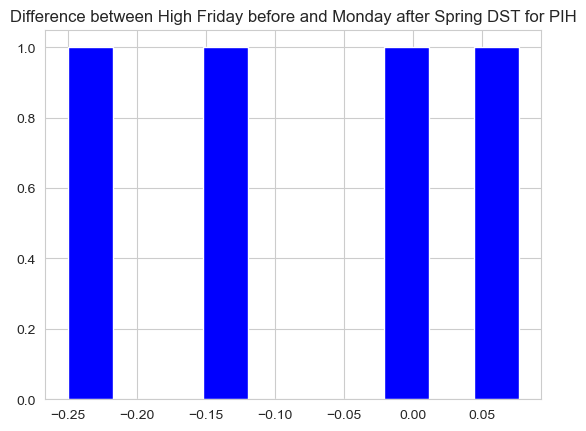

In [43]:
plt.hist(PIH_spring_high_diff,color='b')
plt.title('Difference between High Friday before and Monday after Spring DST for PIH')
plt.show()

In [44]:
# for suppressing what a function prints out as part of debugging
import contextlib
import io

# Suppressing the print output
with contextlib.redirect_stdout(io.StringIO()):
    df_PIH_spring_high=get_dst_fri_mon_prices(df_PIH_reindex,'spring','open','close')

In [45]:
PIH_spring_high_diff = []
for i in range(len(df_PIH_spring_high)):
    PIH_spring_high_diff.append(df_PIH_spring_high[i][2]-df_PIH_spring_high[i][3])

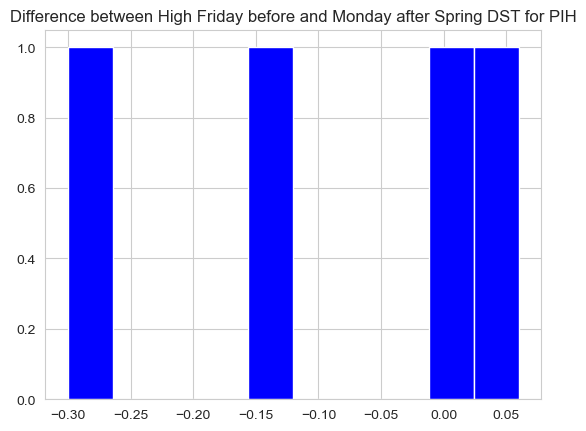

In [46]:
# have 35 years of data for UNP
plt.hist(PIH_spring_high_diff,color='b')
plt.title('Difference between High Friday before and Monday after Spring DST for PIH')
plt.show()

# Finance Sector

We'll now try and study the entire finance sector.

In [47]:
finance['ticker'].values

array(['PIH', 'PIHPP', 'TURN', ..., 'XL', 'YRD', 'ZBK'], dtype=object)

In [48]:
df_PIH.head()

,index,ticker,open,close,adj_close,low,high,volume,date,date_time
0,2386493,PIH,8.00,7.95,7.95,7.90,8.50,642900,2014-04-01,2014-04-01
1,2386510,PIH,7.94,8.16,8.16,7.90,8.29,228400,2014-04-02,2014-04-02
2,2386515,PIH,8.29,8.39,8.39,8.05,8.40,105000,2014-04-03,2014-04-03
3,2386516,PIH,8.50,8.69,8.69,8.32,8.70,113600,2014-04-04,2014-04-04
4,2386533,PIH,9.00,8.94,8.94,8.55,9.00,60500,2014-04-07,2014-04-07


In [50]:
df_finance=pd.DataFrame()

for stock in finance['ticker'].values:
    with contextlib.redirect_stdout(io.StringIO()):
        df_stock = get_stocks(df,df2,stock)
    if df_stock.empty:
        print("Skipping empty DataFrame:", stock)
        continue
    df_finance = pd.concat([df_finance,df_stock],ignore_index=True)

Skipping empty DataFrame: AGFSW
Skipping empty DataFrame: AMRWW
Skipping empty DataFrame: AMBCW
Skipping empty DataFrame: ACFC
Skipping empty DataFrame: AFHBL
Skipping empty DataFrame: BHACR
Skipping empty DataFrame: BHACU
Skipping empty DataFrame: BHACW
Skipping empty DataFrame: BRPAW
Skipping empty DataFrame: BCACR
Skipping empty DataFrame: BCACU
Skipping empty DataFrame: BCACW
Skipping empty DataFrame: BRACR
Skipping empty DataFrame: BRACU
Skipping empty DataFrame: BRACW
Skipping empty DataFrame: HAWK
Skipping empty DataFrame: BPFHP
Skipping empty DataFrame: BPFHW
Skipping empty DataFrame: CATYW
Skipping empty DataFrame: CMSSR
Skipping empty DataFrame: CMSSU
Skipping empty DataFrame: CMSSW
Skipping empty DataFrame: CNACR
Skipping empty DataFrame: CNACU
Skipping empty DataFrame: CNACW
Skipping empty DataFrame: DFBHW
Skipping empty DataFrame: DOTAR
Skipping empty DataFrame: DOTAU
Skipping empty DataFrame: DOTAW
Skipping empty DataFrame: EACQU
Skipping empty DataFrame: EACQW
Skipping e

In [51]:
df_finance.to_csv('finance1970-2018.csv')

In [52]:
df_finance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3134211 entries, 0 to 3134210
Data columns (total 9 columns):
 #   Column     Dtype  
---  ------     -----  
 0   index      int64  
 1   ticker     object 
 2   open       float64
 3   close      float64
 4   adj_close  float64
 5   low        float64
 6   high       float64
 7   volume     int64  
 8   date       object 
dtypes: float64(5), int64(2), object(2)
memory usage: 215.2+ MB
